In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2
import math
import numpy as np

from BoseHubbardHamiltonian_class import BoseHubbardHamiltonian

from qiskit.quantum_info import Pauli, Operator
from qiskit.quantum_info import SparsePauliOp

from symmer.operators import PauliwordOp, QuantumState
from symmer.projection import QubitTapering 

import rustworkx as rx
from qiskit_nature.second_q.hamiltonians.lattices import (
    BoundaryCondition,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)

from symmer.operators import IndependentOp
from scipy.linalg import eigh, eig,eigvals
import scipy.sparse

C:\Users\User\OneDrive\Desktop\Martina\Tesi\tapenv\lib\site-packages\cotengra\hyperoptimizers\hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [3]:
num_nodes = 3
num_qubits = 2
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)
H_instance = BoseHubbardHamiltonian(num_nodes, num_qubits, line_lattice)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

H_eigvals = []
H_tap_pos_eigvals = []
H_tap_neg_eigvals = []

Ntot = 2
Nmax = 3
Us = np.arange(0.02,1,0.02)

for u in Us:
        
    H_q = H_instance.get_H(u, 1-u)
    H_q_matrix = H_q.to_matrix()

    H_eigvals_array = eigvals(H_q_matrix)
    
    H_eigvals_const = sorted([e for e in H_eigvals_array if e <7])
    
    H_eigvals.append(H_eigvals_const)

    H = PauliwordOp.from_qiskit(H_q)
    IndependentOp.symmetry_generators(H)
    taper_hamiltonian = QubitTapering(H, 'X')
    taper_hamiltonian.stabilizers.rotate_onto_single_qubit_paulis()
        
    sec_array = [1]    
    H_tap_p = taper_hamiltonian.taper_it(sector=sec_array)
    
    H_tap_p_sparse_matrix = H_tap_p.to_sparse_matrix
    H_tap_p_sparse_array =  H_tap_p_sparse_matrix.toarray()
    
    H_tap_p_eigvals = eigvals(H_tap_p_sparse_array)
    eigs_const_pos = sorted([e for e in H_tap_p_eigvals if e <7])
    
    H_tap_pos_eigvals.append(eigs_const_pos)
        
    sec_array = [-1]
    H_tap_n= taper_hamiltonian.taper_it(sector=sec_array)

    H_tap_n_sparse_matrix = H_tap_n.to_sparse_matrix
    H_tap_n_sparse_array =  H_tap_n_sparse_matrix.toarray()

    H_tap_n_eigvals = eigvals(H_tap_n_sparse_array)
    eigs_const_neg = sorted([e for e in H_tap_n_eigvals if e <7])
    
    H_tap_neg_eigvals.append(eigs_const_neg)







C:\Users\User\OneDrive\Desktop\Martina\Tesi\tapenv\lib\site-packages\numpy\lib\type_check.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(val).real
C:\Users\User\OneDrive\Desktop\Martina\Tesi\tapenv\lib\site-packages\numpy\lib\type_check.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(val).real
C:\Users\User\OneDrive\Desktop\Martina\Tesi\tapenv\lib\site-packages\numpy\lib\type_check.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

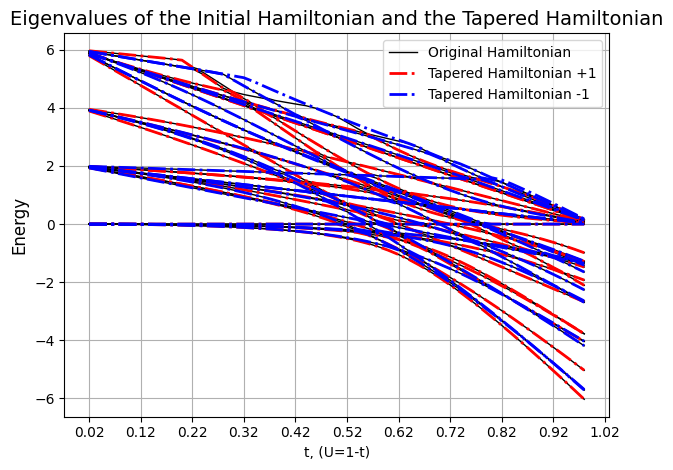

In [40]:

x_values = Us
y_values = np.real(H_eigvals)
y_values_p = np.real(H_tap_pos_eigvals)
y_values_n = np.real(H_tap_neg_eigvals)


import matplotlib.pyplot as plt

# Plot per gli eigenvalues dell'Hamiltoniana originale
for j in range(len(y_values[0])):
    x_points = x_values
    y_points = [y_values[i][j] for i in range(len(x_values))]
    plt.plot(x_points, y_points, label='Original Hamiltonian' if j == 0 else '', color='black', linewidth=1)

# Plot per gli eigenvalues dell'Hamiltoniana con +1
for j in range(len(y_values_p[0])):
    x_points = x_values
    y_points = [y_values_p[i][j] for i in range(len(x_values))]
    plt.plot(x_points, y_points, label='Tapered Hamiltonian +1' if j == 0 else '', linestyle='-.',color='red', linewidth=2)

# Plot per gli eigenvalues dell'Hamiltoniana con -1
for j in range(len(y_values_n[0])):
    x_points = x_values
    y_points = [y_values_n[i][j] for i in range(len(x_values))]
    plt.plot(x_points, y_points, label='Tapered Hamiltonian -1' if j == 0 else '', linestyle='-.',color='blue', linewidth=2)



# Personalizzazione dell'aspetto del grafico
plt.xlabel("t, (U=1-t)")
plt.ylabel('Energy', fontsize=12)
plt.xticks(np.arange(min(x_values), max(x_values) + 0.1, 0.1), fontsize=10)
plt.title('Eigenvalues of the Initial Hamiltonian and the Tapered Hamiltonian', fontsize=14)
plt.legend(loc='upper right', fontsize='medium')
plt.grid(True)
plt.tight_layout()
#plt.figure(figsize=(24, 16))  # Dimensioni della figura raddoppiate

# Salvataggio e visualizzazione del grafico
plt.savefig("C:\\Users\\User\\OneDrive\\Desktop\\Martina\\Tesi\\Immagini Tesi\\Eigenvalues_tap.png")
plt.show()

